<a href="https://colab.research.google.com/github/shivadattasaiyaga/Stock_Price_Prediction_Using_LSTM/blob/main/Stock_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import  Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
start = datetime(2012,1,1)
end = datetime(2022,8,1)
df = yf.download('RELIANCE.NS', start, end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,345.128540,351.542725,340.348846,349.957764,322.067108,8679938
2012-01-03,352.780975,360.037201,351.839905,358.922760,330.317627,9455771
2012-01-04,360.284851,362.043182,353.325836,354.712677,326.443115,8557084
2012-01-05,354.143066,359.071350,343.791199,346.465851,318.853485,13364666
2012-01-06,345.252350,358.600830,345.054230,355.406097,327.081207,9495456
...,...,...,...,...,...,...
2022-07-25,2467.449951,2467.449951,2403.000000,2420.399902,2413.134521,10665470
2022-07-26,2421.100098,2443.899902,2411.350098,2421.500000,2414.231445,5216466
2022-07-27,2419.949951,2427.000000,2402.000000,2419.199951,2411.938232,3994321


In [ ]:
df.shape

(2609, 6)

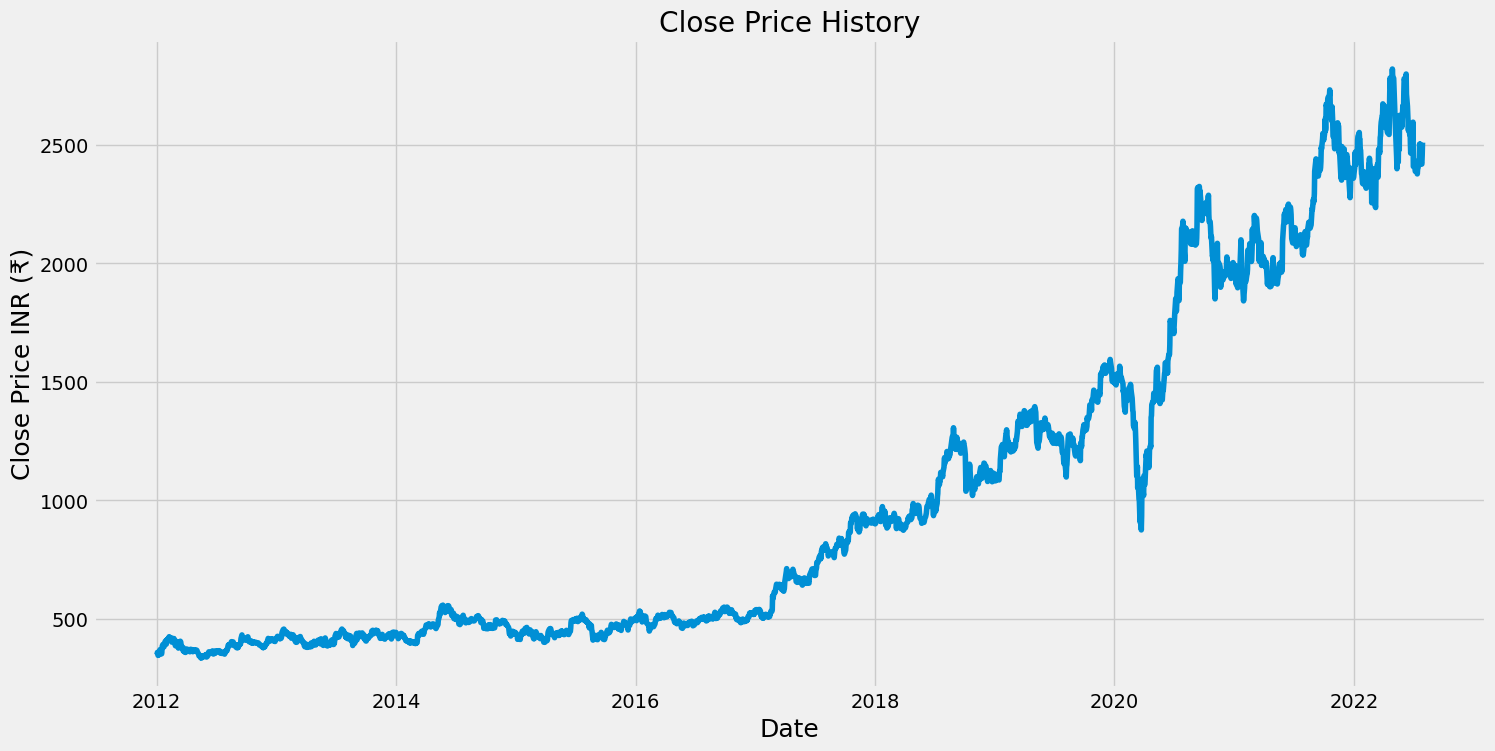

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (₹)', fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values

In [ ]:
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

2088

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0060693 ],
       [0.00967698],
       [0.00798277],
       ...,
       [0.83877092],
       [0.85402264],
       [0.8750892 ]])

In [ ]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.0060693 , 0.00967698, 0.00798277, 0.00466409, 0.00826181,
       0.00600949, 0.01197914, 0.01438094, 0.01211866, 0.01110213,
       0.00734495, 0.01314516, 0.02065952, 0.02183551, 0.02323075,
       0.0190251 , 0.02145679, 0.02289191, 0.02876188, 0.02364932,
       0.02810412, 0.03091453, 0.03052585, 0.0323297 , 0.03127331,
       0.03357545, 0.03633603, 0.03542912, 0.03331634, 0.03451226,
       0.03444249, 0.03200083, 0.02717728, 0.02832337, 0.03337614,
       0.03135304, 0.03258882, 0.02867218, 0.02099836, 0.02399813,
       0.02883163, 0.02687831, 0.02750616, 0.02419745, 0.02002169,
       0.01708173, 0.01947356, 0.02440674, 0.02867218, 0.02758589,
       0.02402802, 0.01918455, 0.01574629, 0.01683258, 0.01832747,
       0.01200903, 0.01354379, 0.01076329, 0.01095263, 0.00988627])]
[0.009676984256488524]

[array([0.0060693 , 0.00967698, 0.00798277, 0.00466409, 0.00826181,
       0.00600949, 0.01197914, 0.01438094, 0.01211866, 0.01110213,
       0.00734495, 0.01314516, 0.0

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2028, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2028/2028 [==============================] - 59s 27ms/step - loss: 4.9091e-04


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

17/17 [==============================] - 1s 15ms/step


In [ ]:
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

3.1277328754798464

<ipython-input-352-c799448b6b8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


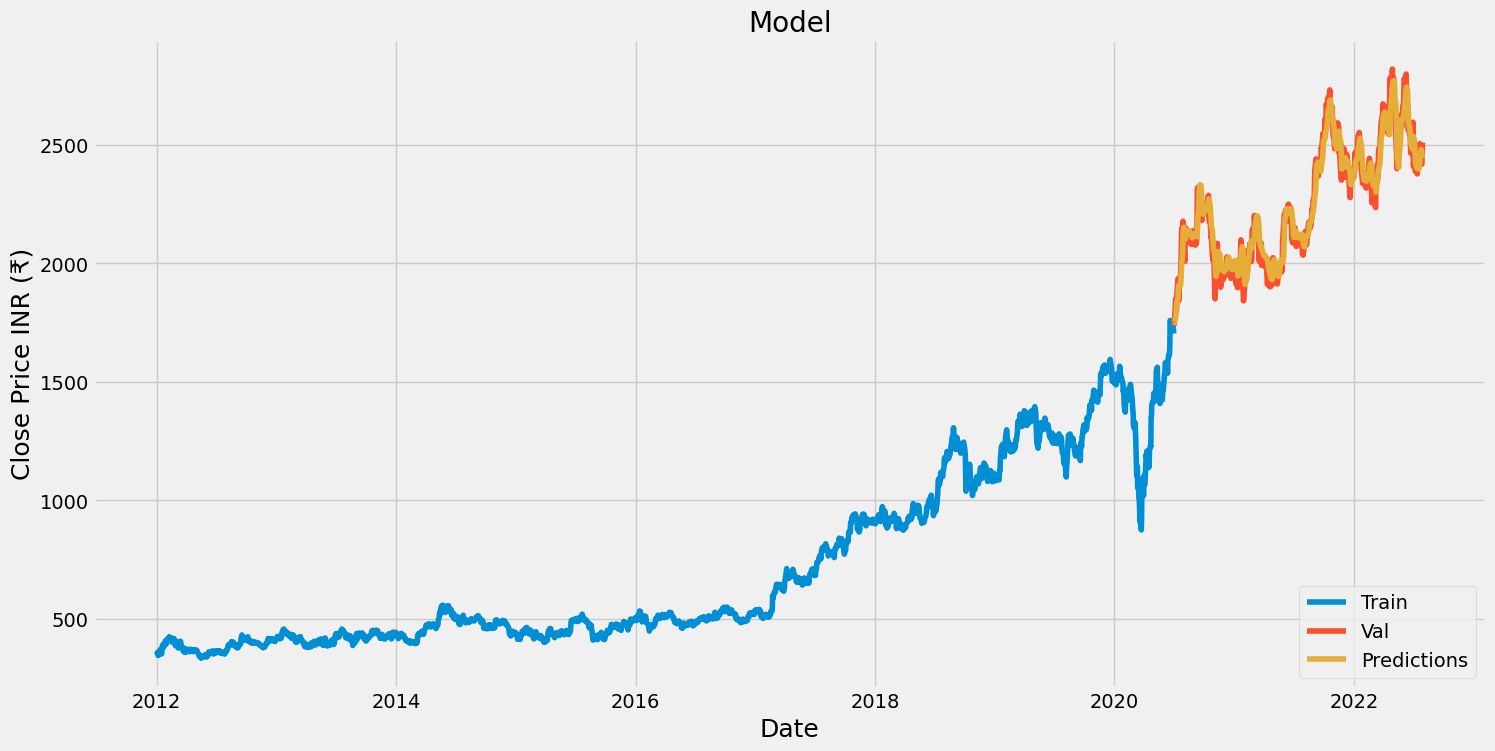

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR (₹)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2020-07-01,1737.599976,1752.486328
2020-07-02,1760.349976,1751.220215
2020-07-03,1787.900024,1756.668091
2020-07-06,1851.800049,1769.478516
2020-07-07,1823.449951,1795.963745
...,...,...
2022-07-25,2420.399902,2480.067871
2022-07-26,2421.500000,2475.419434
2022-07-27,2419.199951,2462.650146
